<div style="text-align: right"> CS824 - Lab 5a (2022)</div>

# Some simple statsitical distributions

As we get to the later parts of the lab using Bayesian inference we will need to work with probability distributions, so if you are unfamiliar with these (you may only have drawn from random or Uniform distributions in previous labs) then the exercises below may be useful. If you feel confident in using distributions you can move straight to the "SUBMIT" elements and answer the questions.


# Bernoulli Distribution
This is probably the simplest type of probability distribution - as it generates only one of two outcomes, normally referred to as `success` or `failure` (or `1`/`0`; `yes`/`no`; `true`/`false`; etc.) and has only one parameter value `p`. (Sometimes `q` is also noted, but as this is simply `= 1 - p` it is not really a separate parameter.)

Formally we state that a random variable X that has a Bernoulli distribution will take the value `1` with the probability of success `p` and the value `0` with the probability of failure, `q` = (1 - `p`). While the Bernoulli distribution defines the success/failure of a single trial (n = 1) we will typically generate the set of outcomes over a range of trials to observe the 'average' behaviour of the distribution.

There are a number of ways to work with distributions in Python, with the functions in `numpy` and `scipy.stats` being  the most common. The best way to understand distributions is almost always to graph/plot them and as such we will use various plots to do so - mostly using the 'basic' functions of `matplotlib` but sometimes also using `seaborn` as it provides 'nicer' output at times (and gives you some exposure to more than one way of graphing output).


In [192]:
# Given that we will need them at various places, load these libraries now...

import numpy as np
import seaborn as sns
from scipy.stats import bernoulli, binom, uniform, poisson
import matplotlib.pyplot as plt


A common way to reference these types of distribution is to look at the output of a random variable that has been defined to be of that particular type. In this case we use the `bernoulli.rvs` function to generate a series of outputs. The function can take a few parameters, with the essential parameter being `p` to which we can also specify `size` the number of trials we wish to simulate. 


In [193]:
# A very basic call to the Bernoulli function could be used to create a random  variable 'r_Bern'.
# Here we are going to run 10 trials, each of which has a p(`success`) = 0.25

r_Bern = bernoulli.rvs(p=0.25, size=10)
print(r_Bern)


[0 1 1 0 0 0 0 0 0 1]


Note that every time you run those last two lines you will (almost certainly) get a different outcome...  Indeed, it is quite likely that you may run the command and get all `0` outcomes... (much **less** likely that you will get all `1`s - though you could in fact calculate how likely this might be, and we will do so when we get to the **Binomial** distribution below.)


## Exercise 5a1

Alter the values of the two parameters being passed to the Bernoulli fucntion above and check that the output makes sense to you...


## Exercise 5a2
Perhaps a more useful way to view the output is as a graph (histogram) that summarises the numbers of `0` and `1` outcomes...  We can do this using the code below. (Note that I have increased the overall number of trials and reduced the likelihood of getting a `success`.) 


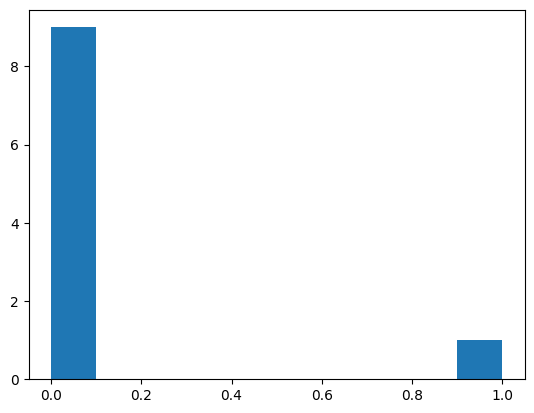

In [194]:
# Plotting, rather than just listing, the values produced for our Bernoulli distribution

# For this type of distribution it is arguably more useful to keep the y-axis limited to 1 - i.e. we are typically
# thinking in terms of proportions, rather than absolute numbers.

plt.hist(bernoulli.rvs(size=30,p=0.15),density=True)
plt.show()


## Exercise 5a2 (cont.)
Alter the `density` parameter to see the absolute number in the '0'and '1' classes of the output...


# Binomial Distribution
This distribution builds on the Bernoulli in a way that makes things a bit more 'useful'. This is still a discrete probability distribution but now allows us to model the outcomes of a certain number of random trials within the same 'experiment'. The Binomial requires two parameters: the probability of success for any given trial (same as `p` in the case for Bernoulli), and also the number of trials (`n`) to be conducted within our experiment. The outcome of the Binomial distribution represents how likely it is that we will observe a given number of successes (up to `n`) in the experiment. 

So, if we wanted to model the tossing of a fair coin 8 times and assumed that there was a 50% chance of getting a head (which we can refer to as a `success`). The Binomial distribution will tell us how likely it is that we will get 0 heads, 1 head... up to 8 heads. 

Due to the random effects present in any random variable we need to run a number of experiments to get a picture of the 'average' behaviour over time...


## Exercise 5a3
Once again we use the **scipy** library, but now use the `binom.rvs` and will initally simulate 100 experiments.


In [195]:
fair_coin_tosses = binom.rvs(n=8,           # Number of trial in each experiment
                             p=0.5,         # Probability if success
                             size=100)      # Number of experiments

# fair_coin_tosses

In [196]:
# This output is not very easy to interpret - it just lists the outcome of each of 100 experiments.
# You many even see a "0" or "8" in this 100 outputs listed, maybe not, that depends on your random 
# number generator.  However, we could generate a table of values that might be more useful to get a 
# summary. (We will import pandas to help us out, but we could generate tables in other ways.)

import pandas as pd

print(pd.crosstab(index="counts", columns=fair_coin_tosses))


col_0   1  2   3   4   5  6  7  8
row_0                            
counts  5  4  22  31  30  5  2  1


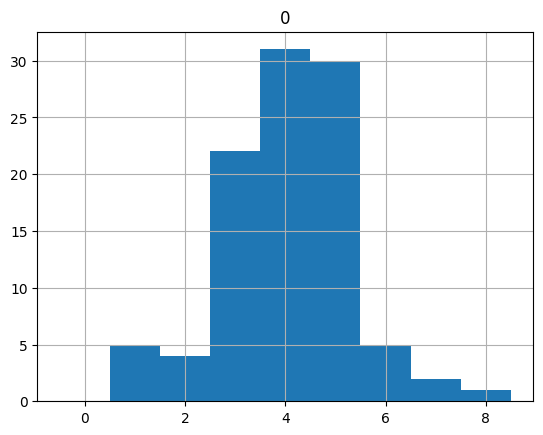

In [197]:
# We can see from the table that 3, 4, and 5 'successes' seem most likely but maybe a graph would be more useful?
# Pandas also provides some simple 'built in' graphs, such as histograms.

pd.DataFrame(fair_coin_tosses).hist(range=(-0.5, 8.5), bins=9);


## Exercise 5a4
This is where we may have a bit of an 'issue' in that I don't know how symetrical your set of outputs might happen to look, due to the fact that we will all get different results! However, mine did not look very symetrical with more cases of `3` than any other outcome.

Use the same distribution as above but simulate 1,000 experiments and then 10,000 to see what difference this makes...  (NB - esp for the case of 10,000 you may wish to switch off the on-screen output!!)


## Exercise 5a5
Hopefully as you increased the number of simulations you found the shape of the distribution was a bit more stable and also symetrical (around the most common value of 4)? As the distribution is disrete the output values can only take on integer values {0 - 8} and so while the distribution looks a bit like the `normal` it will never have 'smooth' edges.


## Exercise 5a6
If you run a large enough number of experiments then the distribution will converge to stable values...  this is nicely illustrated in the [Online_Stats_Book](http://onlinestatbook.com/2/calculators/binomial_dist.html) calculator for the Binomial distribution.

Compare the outputs from that calculator to your own. You may also notice that you can get probabilities for specific values or ranges of values (below the graphical output). We can use the probability mass function (`pmf`) and cummulative density function (`cdf`) to get the sorts of probability values shown in that panel.

A couple of examples are shown below to give you the syntax of the necessary function calls. 

Modify these to find, for the case of experiments consisting of **20** 'fair' trials, the chances of:

 - getting exactly 12 successes   {I get the value = 0.1201}
 - getting at most 6 succesful outcomes  {I get the value = 0.0577}
 - getting 11 or more successful outcomes  {I get the value = 0.4119}
 - getting 18 or more successful ourcomes  {I got value = 0.0002...  which I notice the **_Online-Stats calculator_** reports as "0"}

(You could of course get these pretty easily from the **_Online-Stats calculator_** but that would be 'cheating'!!  However, feel free to use it to check your values.)


In [198]:
binom.pmf (k=8,      # Probability of exactly k = 8 successes
           n=15,     # In an experiment involing 15 trials
           p=0.5)    # With the success of probability = 0.5


0.19638061523437514

In [199]:
binom.cdf (k=3,      # Probability of k = 3 successes or less (i.e. cummulative up to at most 3)
           n=10,     # In an experiment involing 10 trials
           p=0.2)    # With the success of probability = 0.2


0.8791261183999999

In [200]:
1 - binom.cdf(k=8,         # Probability of k = 9 successes or more (1 minus the cummulative total up to 8)
              n=12,        # In an experiment involing 12 trials
              p=0.5)       # With the success of probability = 0.5


0.072998046875

## Exercise 5a7 (SUBMIT)
Let's be a bit sexist for a moment and assume that 80% of the population who purchase sports cars are men. If 10 sports car owners are picked at random what is the probability that this will include 8 or more men?

Does this answer seem to make intutitve sense?  If not, is it lower/higher than you expected?

What is the probability that there will be more than 4 women in this random sample? 


In [201]:
# The data for the first question
men_in_carbuyers = 0.8
n_trials = 10
lbound = 8

# The complementary of the cummulative density function
print(1 - binom.cdf(k=lbound-1,      # Probability of k=7 or less (then we take the complementary)
            n=n_trials,     # In an experiment involing 10 trials
            p=men_in_carbuyers))    # With the success of probability = 0.8

# Another way of doing it: the sum of all relevant values we get from the mass function
sum_prob = 0
for i in range(lbound,n_trials+1):
    sum_prob += binom.pmf(k=i,      # Probability of exactly k = i successes
                          n=n_trials,     # In an experiment involing 10 trials
                          p=men_in_carbuyers)    # With the success of probability = 0.8
print(sum_prob)

0.6777995264000001
0.6777995264


We believe it makes intuitive sense, because to pick 8 men would be the highest probability; to pick 7 or 9 would be less but still high, and with more than 8 we are picking 8 and 9, but not 7, and adding the possibility of 10 as well. So it makes sense that it is about two thirds. 

In [202]:
# The data for the second question
lbound = 5
women_in_carbuyers = 1 - men_in_carbuyers

# The complementary of the cummulative density function
print(1 - binom.cdf(k=lbound-1,      # Probability of k=7 or less (then we take the complementary)
            n=n_trials,     # In an experiment involing 10 trials
            p=women_in_carbuyers))    # With the success of probability = 0.2

# Another way of doing it: the sum of all relevant values we get from the mass function
sum_prob = 0
for i in range(lbound,n_trials+1):
    sum_prob += binom.pmf(k=i,      # Probability of exactly k = i successes
                          n=n_trials,     # In an experiment involing 10 trials
                          p=women_in_carbuyers)    # With the success of probability = 0.2
print(sum_prob)

0.03279349759999994
0.03279349759999994


In [203]:
# another way is to calculate 5 men or less
men_in_carbuyers = 0.8
ubound = 5

# The cummulative density function
print(binom.cdf(k=ubound,      # Probability of k=5 or less
            n=n_trials,     # In an experiment involing 10 trials
            p=men_in_carbuyers))    # With the success of probability = 0.8

# Another way of doing it: the sum of all relevant values we get from the mass function
sum_prob = 0
for i in range(ubound+1):
    sum_prob += binom.pmf(k=i,      # Probability of exactly k = i successes
                          n=n_trials,     # In an experiment involing 10 trials
                          p=men_in_carbuyers)    # With the success of probability = 0.8
print(sum_prob)

0.03279349759999997
0.03279349759999994


Very low value, as expected, because having 5 or more women with a 0.2 success rate each is very improbable. We can see that the value that contributes 80% of this cummulative probability is the border value of having 5 women and 5 men.

In [204]:
print(binom.pmf(k=5,n=n_trials,p=women_in_carbuyers))
print(binom.pmf(k=5,n=n_trials,p=women_in_carbuyers) / sum_prob)

0.026424115199999956
0.8057730078782448


## Stats Distributions in `scipy`
This may be a good time to review the various types of functions in `scipy` associated with random variables.

- `stats.{distribution}.rvs()` are used to generate random numbers from the specified {distribution}, such as in the example of our 10,000 values from the `uniform` distibution above.
- `stats.{distribution}.cdf()` the "cumulative distribution function" (cdf) can be used to determine the likelihood that an observation drawn from the specified distribution will fall below a specified value. Remember that the total area within an probability distribution must sum to 1 and as such this value is equivalent to the area within the density curve to the left of the value specifed.
- `stats.{distribution}.ppf()` this can be seen as the 'inverse' of the cumulative distribution function - it stands for "percent point function". This returns the x cut-off value that is associated with the given probability (quantile). So we could, for example, ask for the cut-off value at whcih we have a 30% chance of drawing an observation from the distribution below this value.
- `stats.{distribution}.pdf()` the "probability density function" returns the probability (the height of the density function) for a given value of x. (This is not very interesting for the uniform case as all outcomes within the range have the same density/probability value, while all outcomes outside then range have a probability density of 0!)

If you watched the short video by Ben Lambert introducing his little app the **Distribution Zoo** then you may remember that he has a feature where you can create a function (using menus), look at its PDF/CDF/etc, and then also show the code needed to create this function in a vareity of languages. Ben's app is here -

        https://ben18785.shinyapps.io/distribution-zoo/
        
while his video on its use can be seen at the following link -
        
        https://www.youtube.com/watch?v=mGaZHhGwF4Y&list=PLwJRxp3blEvZ8AKMXOy0fc0cqT61GsKCG&index=75


### Distributions are also available in Numpy

There are in fact many other packages in Python to allow us to work with random variables and statistical distributions; in fact in the 'Swedish Fish Inc' examples that come next, we will switch to using the functions that are offered to us in `Numpy`.


<div style="text-align: right"> CS824 - Lab 5b (2022) </div>

# Explorations with the 'Swedish Fish Inc'

### Rasmus Bååth (adapted for Python by Christophe Carvenius, with some modifications by Crawford Revie)

These exercises are related to some examples of Bayesian Data Analysis in a series of videos by Ramsus Bååth that are referenced on the MyPlace pages. You should really watch the first 20 minutes of his video, "What is Bayes?" before you take a stab at the first example below to get a sense for what we are trying to achieve.


Swedish Fish Incorporated is the largest Swedish company delivering fish by mail order. They are now trying to get into the lucrative Danish market by selling one year salmon subscriptions. The marketing department have run a pilot study and set up a marketing approach, that we will refer to as "Method A":

**Method A:** Mail out a colorful brochure that invites people to sign up for the one year salmon subscription.

The marketing department sent out 16 brochures using Method A. Six Danes who received the brochure signed up for a salmon subscription; the marketing department now wants to know, how 'good' is Method A?


### We will use a Bayesian model to address this question. This will help us answer questions like, "what might the expected rate of sign-up be if Method A was used on a much larger number of people?"

A few things to note:

**Note 1:** The answer is not a single number but a distribution over probable rates of sign-up.

**Note 2:** We will use a simple 'generative model', which here will be the Binomial distribution. We can sample this within Python using the `np.random.binomial(n, p, size)` function. The binomial distribution simulates the process n times: The number of `successes` when performing `size` trials, where the probability of `success` is p.

**Note 3:** A commonly used prior for the unknown probability of success in a Binomial distribution is a `uniform` distribution from 0 to 1. You can draw from this distribution by running `np.random.uniform(0, 1, size = n_draws)`

**Note 4:** I have provided some code below, but it is only one of a number of ways to tackle this problem. Hopefully it can also provide a useful 'scaffold' for some of the extensions that you are asked to build in later exercises.


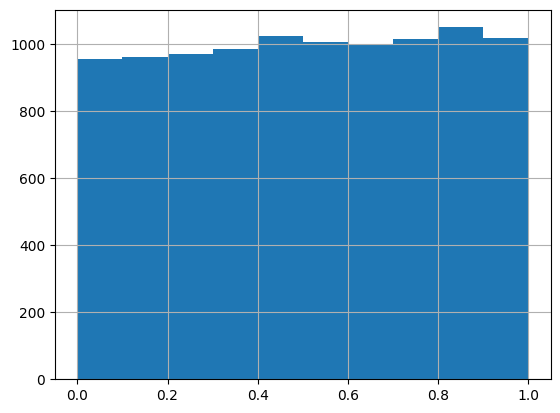

In [205]:
# Import some useful Python libraries

import pandas as pd
import numpy as np

# Number of random draws from the prior   (start with 1,000 - later you can try different options)
n_draw = 10000

# Defining and drawing from the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw)) 

# It's always good to eyeball the prior to make sure it looks ok.
prior_rate.hist() 

#### Running over a larger set of trials (draws)

Your histogram may look a bit 'staggered' so you may wish to set the number of draws to 10,000 and see how things look.


### Turning a prior into a posterior

We now have our prior distribution - an 'uninformative' uniform distribution in the first instance. We are now ready to generate a posterior distribution from this, using our 'generative' model, which in this case is a simple `Binomial` model that returns the number of `successes` (out of 16) for various p-values, as defined in our `prior`.


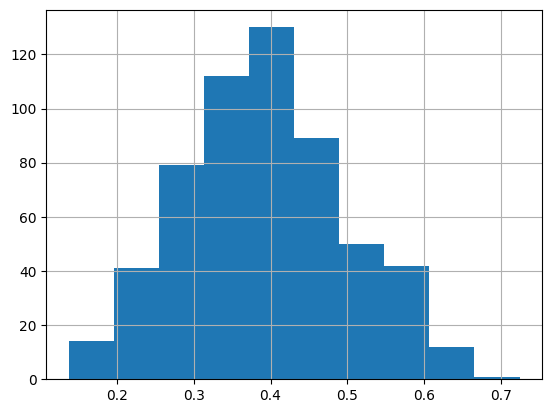

In [206]:
# Defining the generative model
def gen_modelA(prob):
    return(np.random.binomial(16, prob))


# A list into which we will collect the outputs from our generative model
subscribers = list()

# Simulating the data (using the 'prior' set up on the last cell)
for p in prior_rate:
    subscribers.append(gen_modelA(p))

    
# Now we want to compare the outputs from the generative model with the data we actually observed.

# Observed data in our marketing exerise with 16 mailed out brochures
observed_dataA = 6

# Here we apply a filter so that we only end up with the draws that match our data.
# There may be some new Python commands here, so you may wish to look them up in the documentation.

post_rate = prior_rate[list(map(lambda x: x == observed_dataA, subscribers))]

# Eyeball the posterior
post_rate.hist()  


Number of draws left: 570, Posterior mean: 0.394, Posterior median: 0.389, Posterior 95% quantile interval: 0.198-0.601


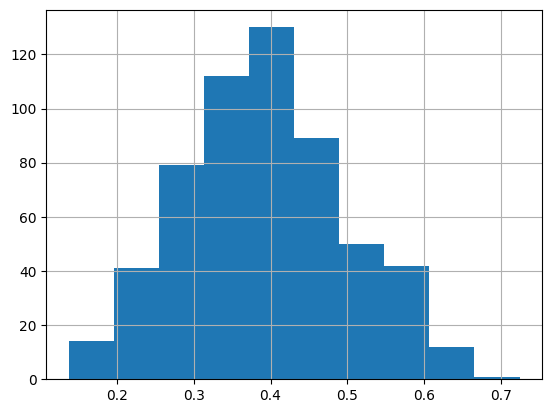

In [207]:
# After the filtering we don't have that many draws left. 
# As a rule of thumb we should aim for >1000 draws to get an more informative summary.

# So go back to the 'prior' stage and increase the number of initial draws to 10,000 or even 50,000.

# New posterior
post_rate.hist()

# With a larger sample we can also summarize the posterior, where a common summary would be to take the mean
# or the median posterior, as well as the 95% quantile interval.

print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))



### Question 1: What’s the probability that Method A is better than telemarketing? (SUBMIT)
----------------
So marketing have told us that the rate of sign-up would be 20% if salmon subscribers were gained by a telemarketing campaign instead (to us it’s very unclear where marketing got this very precise number from). So given the model and the data that we developed in the last question, what’s the probability that method A has a higher rate of sign-up than telemarketing?

**Hint 1:** If you have a vector of samples representing a probability distribution, which you should have from the last question, calculating the amount of probability above a certain value is done by simply *counting* the number of samples above that value and dividing by the total number of samples.

**Hint 2:** The answer to this question only requires a single line of code ;-)


In [208]:
signup_threshold = 0.2
len(list(filter(lambda s: s > signup_threshold, post_rate)))/len(post_rate)
# The proportion of signup rates above 0.2 in our posterior rate 
# list is 96%, so it is that probable that method A is better.

0.9719298245614035

### Question 2: If Method A was used on 500 people what would be the likely number of sign-ups? (SUBMIT)
--------------

**Hint 1:** The answer is *not* a single number but a *distribution* over the probable number of sign-ups.

**Hint 2:** As before, the Binomial distribution is a good candidate for how many people who might sign up out of the 500 possible.

**Hint 3:** Make sure you don’t “throw away” uncertainty, for example by using a summary of the posterior distribution calculated in the first part of the exercise. Try to find a way to use the full original posterior sample!

**Hint 4:** The general pattern when calculating “derivatives” of posterior samples is to go through the values one-by-one, and perform a transformation (say, plugging in the value in a Binomial distribution), and collect the new values in a vector.


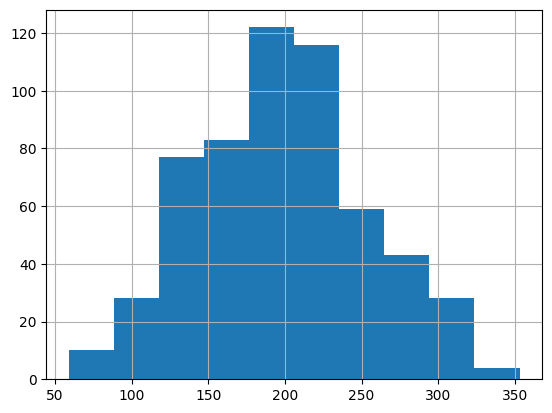

In [209]:
# The data
number_signups = 500
# We apply the binomial again with an experiment size of 500 and the rate of success given by our posterior rates
probabilities_of_signup = list()
for s in post_rate:
    probabilities_of_signup.append(np.random.binomial(number_signups, s))
# We have to do this in order to make the histogram
dist_signups = pd.Series(probabilities_of_signup)
dist_signups.hist()

In [210]:
print('mean: %.3f, median: %.3f, 95%% quantile interval: %.3f-%.3f' % 
      (dist_signups.mean(), dist_signups.median(),  \
    dist_signups.quantile(.025), dist_signups.quantile(.975)))

mean: 197.616, median: 196.000, 95% quantile interval: 96.225-304.775


As we can see, from one 500 people experiment the mean of signups would be ~198 people, and the median ~199. What we can say about its uncertainty is that, with a very high chance (95%) the number of people signing up is between ~88 and ~321. (excuse the differences in values because of several executions)

### Question 3, In his second video Rasmus looks at comparing Method A and Method B, and also introduces a more 'informed' prior (based on the CEO's views). Extend your example to deal with these extensions. (SUBMIT with some comments.)
--------------

**Comment 1:** Reflect on the Method A versus Method B outcomes.

**Comment 2:** You don't have to chose the `Beta` distribution that Rasmus chose for his CEO's 'informed' prior, but if you chose an alternative distribution you should reflect on how this selection has altered your output.


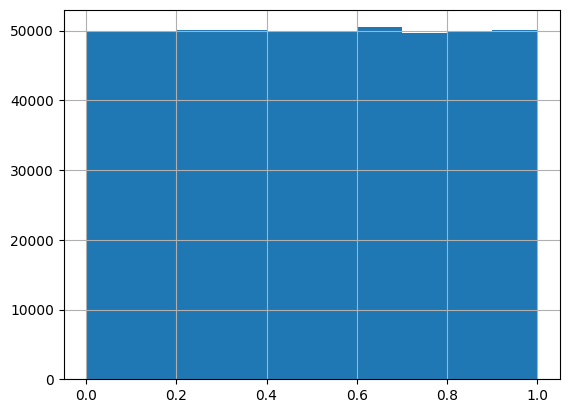

In [211]:
n_draw = 500000

# Instead of drawing one prior distribution, we draw for both
prior_rateA = pd.Series(np.random.uniform(0, 1, size = n_draw))
prior_rateB = pd.Series(np.random.uniform(0, 1, size = n_draw))
prior_rateA.hist()

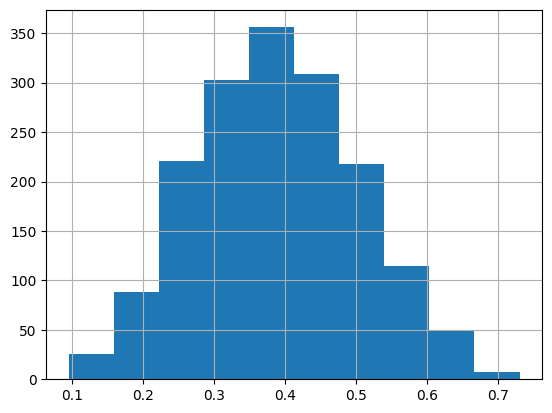

In [212]:
# Defining the generative model for B (which in this case is the same as A)
def gen_modelB(prob):
    return(np.random.binomial(16, prob))

# Simulating the data (using the 'prior' set ups)
subscribersA = list(gen_modelA(p) for p in prior_rateA)
subscribersB = list(gen_modelB(p) for p in prior_rateB)
    
# Observed data in case B
observed_dataB = 10

# Here we apply a filter so that we only end up with the draws that match our data.
# (now both at the same time! because both data are observed together)
my_filter = list(map(lambda t: t == (observed_dataA, observed_dataB), zip(subscribersA,subscribersB)))
post_rateA = prior_rateA[my_filter]
post_rateB = prior_rateB[my_filter]

post_rateA.hist()

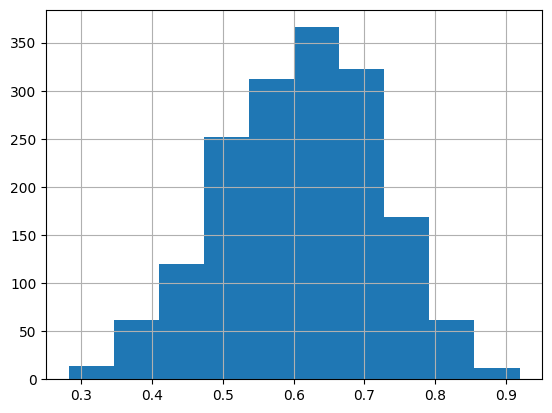

In [213]:
post_rateB.hist()  

0.9125295508274232

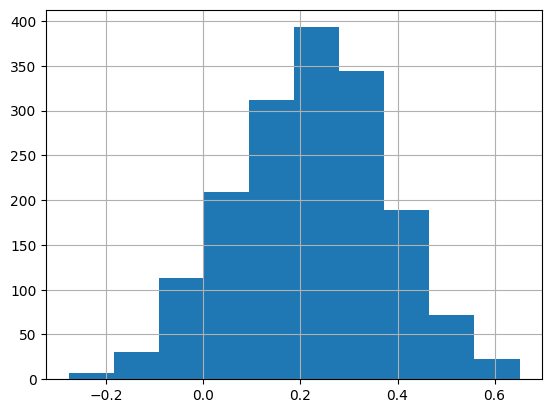

In [214]:
# The solution to the problem of which method is better is to calculate the 
# differente between the posterior value rates for both methods, and see if the resulting distribution 
# has more positive than negative values. In this case 91.7% of the values are positive so B is better than A with that uncertainty

rate_diff = post_rateB - post_rateA
rate_diff.hist()
sum(rate_diff > 0) / len(rate_diff)

# let us then do it with a more informed prior all over again

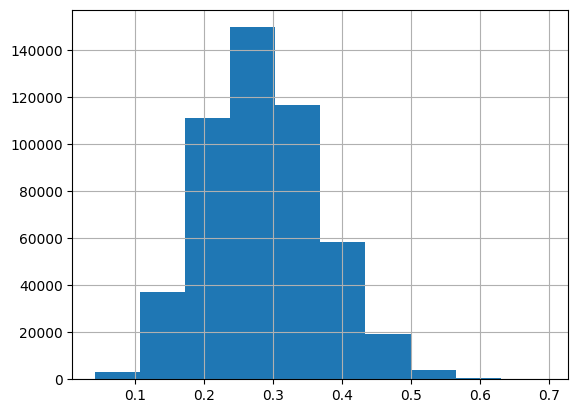

In [215]:
n_draw = 500000

# If we implement a Beta(3,25) like in the video, the generated rates end up rarely matching the observed data
# So we chose a beta that is slightly more leaning to the right instead. This will make the posterior rates also moved to the right
# in comparison to the video.
prior_rateA = pd.Series(np.random.beta(8, 20, size = n_draw))
prior_rateB = pd.Series(np.random.beta(8, 20, size = n_draw))
prior_rateA.hist()

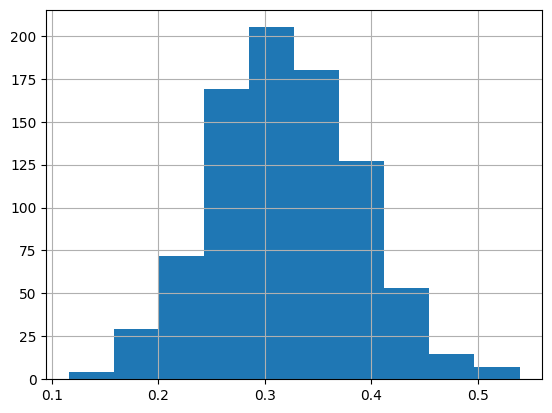

In [216]:
subscribersA = list(gen_modelA(p) for p in prior_rateA)
subscribersB = list(gen_modelB(p) for p in prior_rateB)
observed_dataB = 10

my_filter = list(map(lambda t: t == (observed_dataA, observed_dataB), zip(subscribersA,subscribersB)))
post_rateA_ = prior_rateA[my_filter]
post_rateB_ = prior_rateB[my_filter]

post_rateA_.hist()

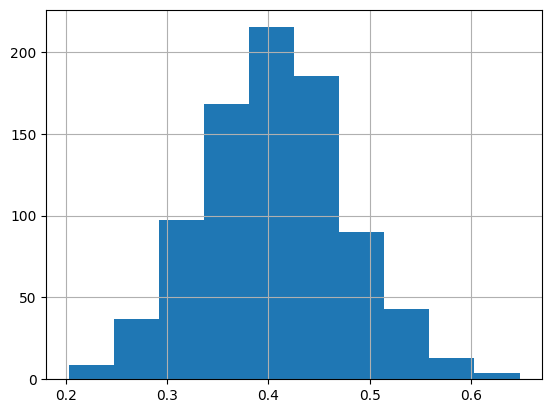

In [217]:
post_rateB_.hist()  

0.8060394889663183

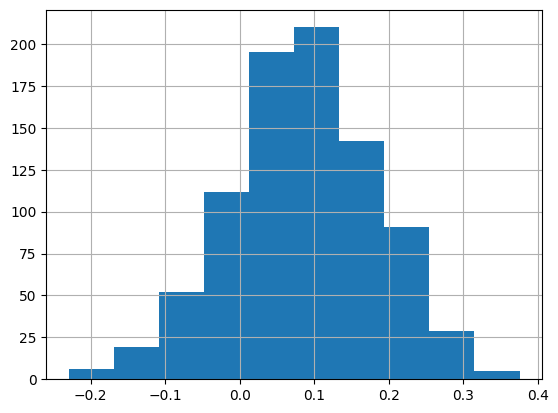

In [218]:
# Having a prior leaning more to the left (than the uninformed) has caused to 
# increase the uncertainty in which we thought that B was better than A. Now it is 83.1%
rate_diff_ = post_rateB_ - post_rateA_
rate_diff_.hist()
sum(rate_diff_ > 0) / len(rate_diff_)

### Question 4. Again in the second video Rasmus looks at how the posterior distributions for Method A and Method B can be directly used to compare costs and profits for each approach. Explore this - you can use whatever costs you feel might be interesting - and provide some reflections. (SUBMIT)
--------------


0.3942080378250591

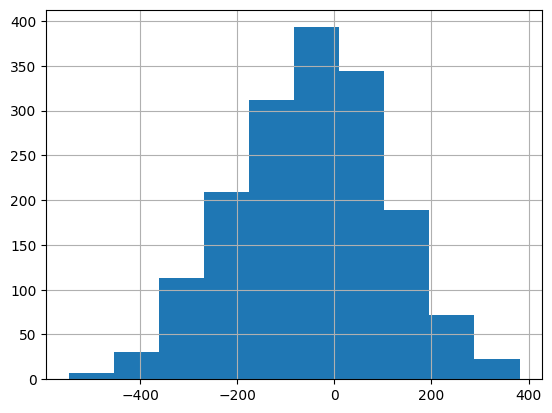

In [219]:
# recovering post rates from the uninformed prior experiment
# first we will use the same costs as in the video
profitA = post_rateA * 1000 - 30
profitB = post_rateB * 1000 - 300
profit_diff = profitB - profitA
profit_diff.hist()
sum(profit_diff > 0) / len(profit_diff)
# as we can see, his interpretation is correct because method A 
# seems to win but there is much uncertainty in the decision

0.3197399527186761

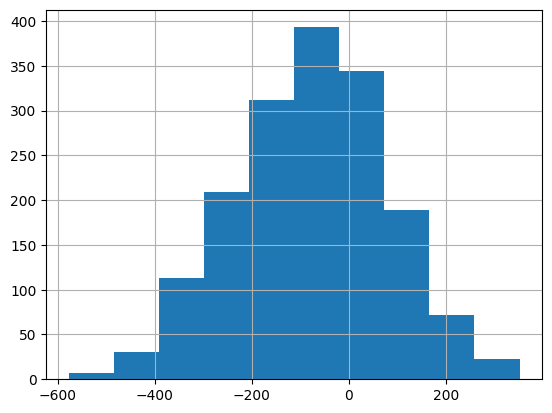

In [220]:
# now we will use the true costs that the video should have used 
# (method B's cost should be brochure + salmon!)
profitA = post_rateA * 1000 - 30
profitB = post_rateB * 1000 - 330
profit_diff = profitB - profitA
profit_diff.hist()
sum(profit_diff > 0) / len(profit_diff)
# not much difference, although we lose a bit more for method B

0.7364066193853428

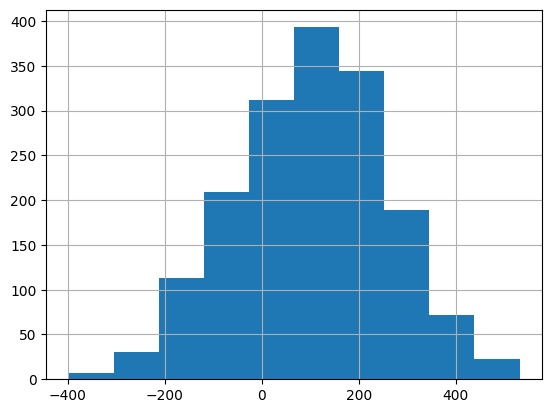

In [221]:
# Let us test with a lower cost for method B so we can see how much
# it should cost for us to prefer it
profitA = post_rateA * 1000 - 30
profitB = post_rateB * 1000 - 150
profit_diff = profitB - profitA
profit_diff.hist()
sum(profit_diff > 0) / len(profit_diff)
# for example, decreasing costs of method B in half would increase
# the chances to top method A to almost 75%.

0.029036004645760744

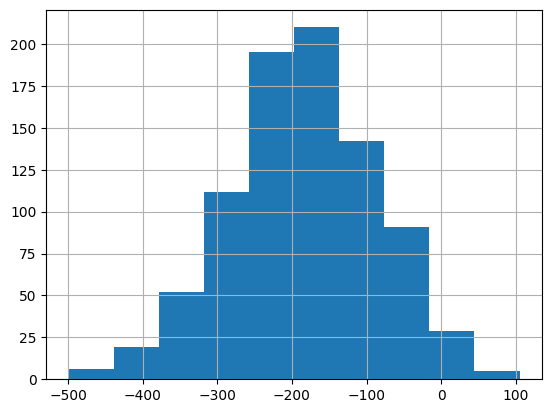

In [222]:
# now taking posterior rates with our informed prior and original costs
profitA = post_rateA_ * 1000 - 30
profitB = post_rateB_ * 1000 - 300
profit_diff = profitB - profitA
profit_diff.hist()
sum(profit_diff > 0) / len(profit_diff)
# we almost completely lose method B! This is 
# because we effectively lowered the chances for a high rate of success
# and so the high costs are less worth it